<a href="https://colab.research.google.com/github/patelvishwa1999/SalesForecasting/blob/main/Walmart_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_features = pd.read_csv('/content/drive/MyDrive/Datasets/walmart/features.csv')
df_stores   = pd.read_csv('/content/drive/MyDrive/Datasets/walmart/stores.csv')
df_train    = pd.read_csv('/content/drive/MyDrive/Datasets/walmart/train.csv')
df_test     = pd.read_csv('/content/drive/MyDrive/Datasets/walmart/test.csv')

In [3]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [5]:
def show_null_report(df_features):
  null_values_percent = df_features.isnull().sum()/len(df_features) * 100
  null_report  = pd.DataFrame({'column_name':df_features.isnull().sum(),
                              'null_values_percent':null_values_percent})
  return null_report

In [6]:
show_null_report(df_train)

,column_name,null_values_percent
Store,0,0.0
Dept,0,0.0
Date,0,0.0
Weekly_Sales,0,0.0
IsHoliday,0,0.0


In [7]:
show_null_report(df_test)

,column_name,null_values_percent
Store,0,0.0
Dept,0,0.0
Date,0,0.0
IsHoliday,0,0.0


In [8]:
show_null_report(df_stores)

,column_name,null_values_percent
Store,0,0.0
Type,0,0.0
Size,0,0.0


In [9]:
show_null_report(df_features)

,column_name,null_values_percent
Store,0,0.000000
Date,0,0.000000
Temperature,0,0.000000
Fuel_Price,0,0.000000
MarkDown1,4158,50.769231
MarkDown2,5269,64.334554
MarkDown3,4577,55.885226
MarkDown4,4726,57.704518
MarkDown5,4140,50.549451
CPI,585,7.142857




---


# **Handling missing values**

Not dropping markdowns though they have more than ***50% of the values*** missing due to data loss.

Also as mentioned on the [walmart-recruiting-store-sales-forecasting](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data) it is only available after Nov 2011, and is not available for all stores all the time.

Any missing value is marked with an NA so assuming them as ***zeroes***
as there is less data for imputing by mean or median.


In [10]:
# Zeroes for NA values ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df_features['MarkDown1'] = df_features['MarkDown1'].fillna(0)
df_features['MarkDown2'] = df_features['MarkDown2'].fillna(0)
df_features['MarkDown3'] = df_features['MarkDown3'].fillna(0)
df_features['MarkDown4'] = df_features['MarkDown4'].fillna(0)
df_features['MarkDown5'] = df_features['MarkDown5'].fillna(0)


df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


Handling missing values of ***CPI(Consumer Price Index)*** and ***Unemployment***

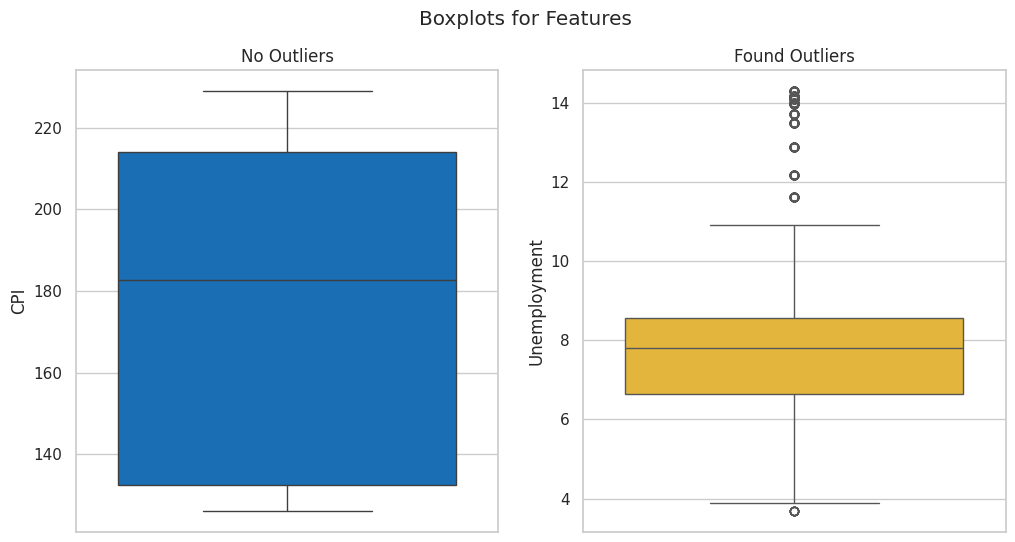

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
walmart_colors = ['#0071ce', '#ffc220', '#041f41']
# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Boxplots for Features')

# Boxplots
sns.boxplot(y=df_features['CPI'], ax=axes[0], color=walmart_colors[0]).set(title='No Outliers')
sns.boxplot(y=df_features['Unemployment'], ax=axes[1], color=walmart_colors[1]).set(title='Found Outliers')
plt.show()

Imputating missing values : ***Mean*** or ***Median*** ?

**CPI** :

No outliers in the CPI feature.

As mean defines the ***centeral tendency of the distribution***.

So replacing nan values with **Mean**.

**Unemployment** :

Outliers found in the Unemployment feature.

Mean is affected by outliers.

Median defines the ***centeral tendency of the distribution*** here.

So replacing nan values with **Median**.

In [12]:
df_features['CPI'].fillna(df_features['CPI'].mean(), inplace = True)
df_features['Unemployment'].fillna(df_features['Unemployment'].median(), inplace = True)

In [13]:
show_null_report(df_features)

,column_name,null_values_percent
Store,0,0.0
Date,0,0.0
Temperature,0,0.0
Fuel_Price,0,0.0
MarkDown1,0,0.0
MarkDown2,0,0.0
MarkDown3,0,0.0
MarkDown4,0,0.0
MarkDown5,0,0.0
CPI,0,0.0


***All the missing values handled.***

---



In [14]:
df_train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


***Negative Sales*** do not make sense .

Taking only ***Non Negative Sales*** into consideration .

In [15]:
df_train = df_train[df_train['Weekly_Sales']>=0]
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420285 non-null  int64  
 1   Dept          420285 non-null  int64  
 2   Date          420285 non-null  object 
 3   Weekly_Sales  420285 non-null  float64
 4   IsHoliday     420285 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 16.4+ MB


train set size : ***420285*** samples

In [16]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [17]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420285 non-null  int64  
 1   Dept          420285 non-null  int64  
 2   Date          420285 non-null  object 
 3   Weekly_Sales  420285 non-null  float64
 4   IsHoliday     420285 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 16.4+ MB


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


train set size : ***421570 samples***

# **Exploratory Data Analysis : exploring Sales**

In [18]:
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


test set size : ***115064 samples***

In [19]:
df_train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [20]:
df_features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [21]:
# 'Date' found in df_features, df_train, df_test.
# Converting 'Date' field to date_time dtype:
df_features['Date'] = pd.to_datetime(df_features['Date'])
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

In [22]:
df_train['day'] = df_train['Date'].dt.day
df_train['week'] = df_train['Date'].dt.week
df_train['month'] = df_train['Date'].dt.month
df_train['year'] = df_train['Date'].dt.year
df_train['day_period'] = (df_train['Date'].dt.date-df_train['Date'].dt.date.min()).apply(lambda x:x.days)

<ipython-input-22-51fa6493ca03>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_train['week'] = df_train['Date'].dt.week


In [23]:
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday,day,week,month,year,day_period
0,1,1,2010-02-05,24924.50,False,5,5,2,2010,0
1,1,1,2010-02-12,46039.49,True,12,6,2,2010,7
2,1,1,2010-02-19,41595.55,False,19,7,2,2010,14
3,1,1,2010-02-26,19403.54,False,26,8,2,2010,21
4,1,1,2010-03-05,21827.90,False,5,9,3,2010,28
...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,28,39,9,2012,966
421566,45,98,2012-10-05,628.10,False,5,40,10,2012,973
421567,45,98,2012-10-12,1061.02,False,12,41,10,2012,980
421568,45,98,2012-10-19,760.01,False,19,42,10,2012,987


In [24]:
df_test['day'] = df_test['Date'].dt.day
df_test['week'] = df_test['Date'].dt.week
df_test['month'] = df_test['Date'].dt.month
df_test['year'] = df_test['Date'].dt.year
df_test['day_period'] = (df_test['Date'].dt.date-df_test['Date'].dt.date.min()).apply(lambda x:x.days)

<ipython-input-24-f796ef5ec505>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_test['week'] = df_test['Date'].dt.week


In [25]:
df_test

,Store,Dept,Date,IsHoliday,day,week,month,year,day_period
0,1,1,2012-11-02,False,2,44,11,2012,0
1,1,1,2012-11-09,False,9,45,11,2012,7
2,1,1,2012-11-16,False,16,46,11,2012,14
3,1,1,2012-11-23,True,23,47,11,2012,21
4,1,1,2012-11-30,False,30,48,11,2012,28
...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,28,26,6,2013,238
115060,45,98,2013-07-05,False,5,27,7,2013,245
115061,45,98,2013-07-12,False,12,28,7,2013,252
115062,45,98,2013-07-19,False,19,29,7,2013,259


In [26]:
#Impact of holidays on sales
print("Holiday")
print(df_train[df_train['IsHoliday']==True]['Weekly_Sales'].describe())
print("Non-Holiday")
print(df_train[df_train['IsHoliday']==False]['Weekly_Sales'].describe())

Holiday
count     29563.000000
mean      17092.566220
std       27249.206776
min           0.000000
25%        2122.830000
50%        7997.860000
75%       21256.915000
max      693099.360000
Name: Weekly_Sales, dtype: float64
Non-Holiday
count    390722.000000
mean      15949.958317
std       22347.258698
min           0.000000
25%        2117.300000
50%        7636.080000
75%       20193.912500
max      406988.630000
Name: Weekly_Sales, dtype: float64


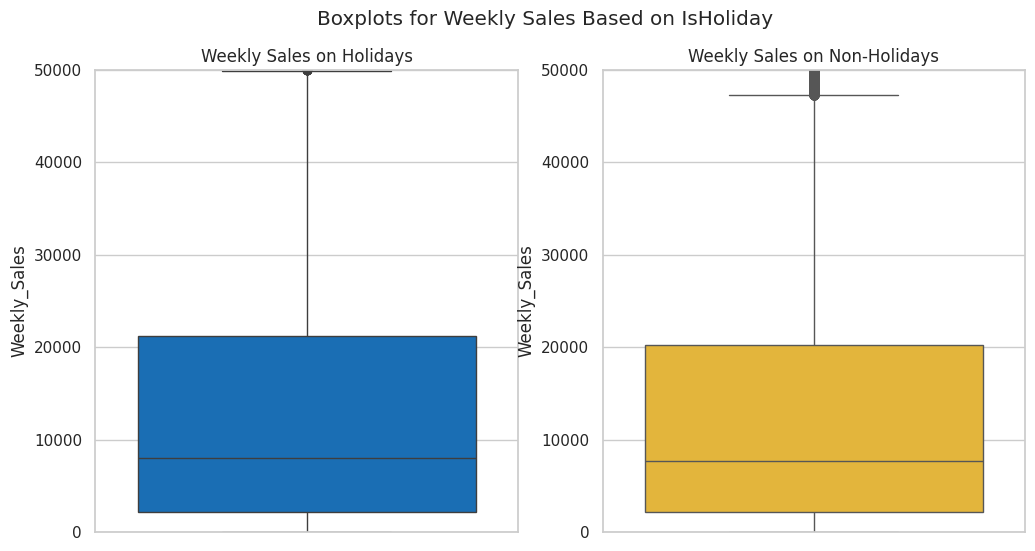

In [27]:
# Display descriptive statistics for 'Weekly_Sales' on holidays
holiday_stats = df_train[df_train['IsHoliday']==True]['Weekly_Sales'].describe()

# Display descriptive statistics for 'Weekly_Sales' on non-holidays
non_holiday_stats = df_train[df_train['IsHoliday']==False]['Weekly_Sales'].describe()

# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Boxplots for Weekly Sales Based on IsHoliday')

# Boxplot for 'Weekly_Sales' on holidays
sns.boxplot(y=df_train[df_train['IsHoliday']==True]['Weekly_Sales'], ax=axes[0], color=walmart_colors[0]).set(title='Weekly Sales on Holidays')
axes[0].set_ylim(0, 50000)
# Boxplot for 'Weekly_Sales' on non-holidays
sns.boxplot(y=df_train[df_train['IsHoliday']==False]['Weekly_Sales'], ax=axes[1], color=walmart_colors[1]).set(title='Weekly Sales on Non-Holidays')
axes[1].set_ylim(0, 50000)
# Show the plot
plt.show()
plt.show()

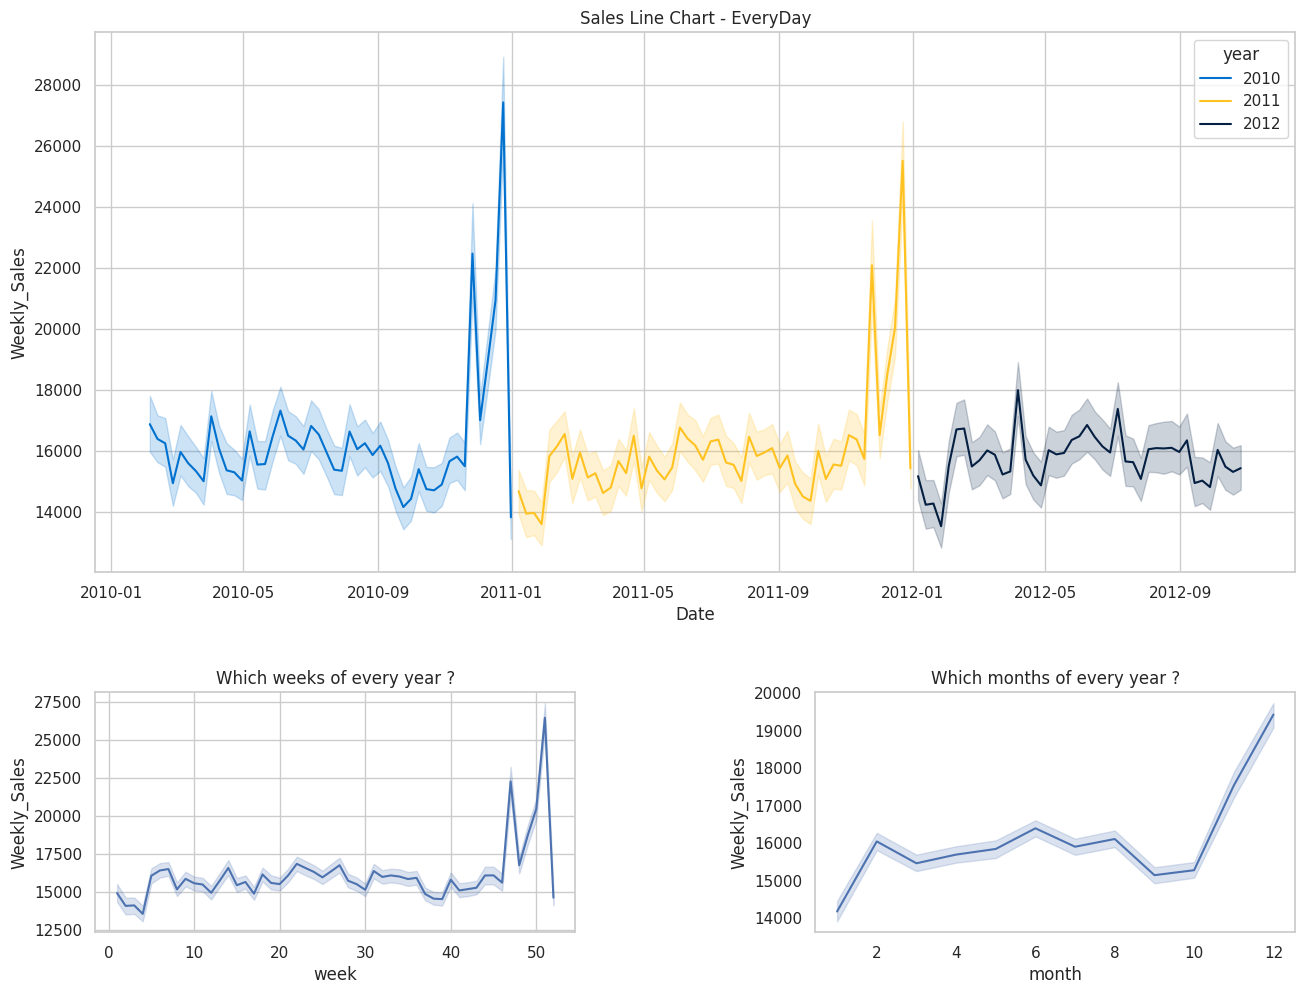

In [28]:
# Create the subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 6))
walmart_colors = ['#0071ce', '#ffc220', '#041f41']

# Define the size of each subplot
big_subplot = (0, 0, 1, 0.9)    # (left, bottom, width, height)
small_subplot1 = (0, -0.6, 0.4, 0.4)
small_subplot2 = (0.6, -0.6, 0.4, 0.4)

# Create the line plots
sns.lineplot(x='Date', y='Weekly_Sales', hue='year', data=df_train, ax=axes[0], palette=walmart_colors)
sns.lineplot(x='week', y='Weekly_Sales', data=df_train, ax=axes[1])
sns.lineplot(x='month', y='Weekly_Sales', data=df_train, ax=axes[2])

# Set positions for subplots
axes[0].set_position(big_subplot)
axes[1].set_position(small_subplot1)
axes[2].set_position(small_subplot2)

# Set titles for subplots
axes[0].set_title('Sales Line Chart - EveryDay')
axes[1].set_title('Which weeks of every year ?')
axes[2].set_title('Which months of every year ?')

# Show the plot
plt.grid(False)
plt.show()

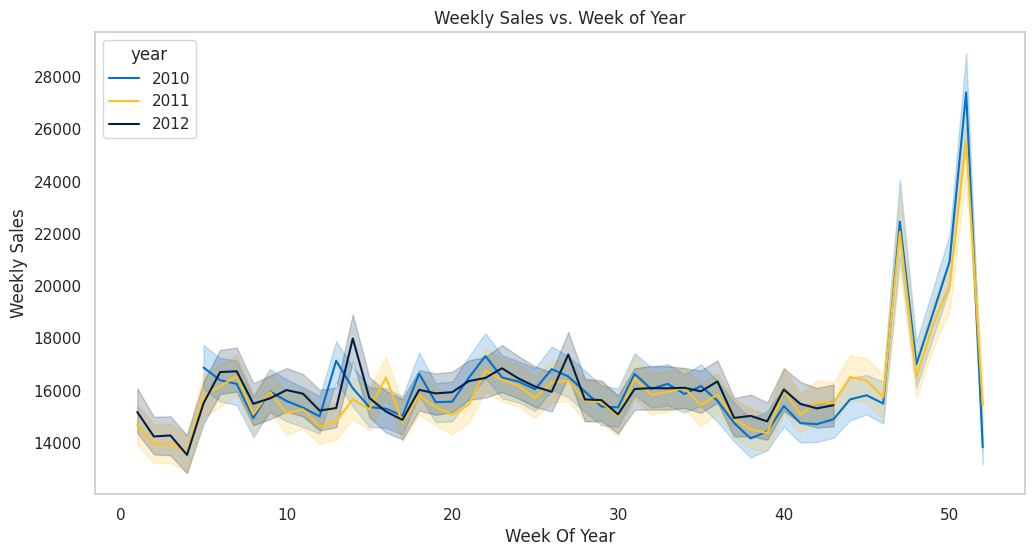

In [111]:
fig, ax = plt.subplots(figsize=(12, 6))
fig = sns.lineplot(df_train, x = 'week', y = 'Weekly_Sales', hue = 'year', palette = walmart_colors)
plt.xlabel('Week Of Year')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. Week of Year')
plt.grid(False)
plt.show()

*  ***End of the year Sales*** are high due to holiday season.
*  ***Week 45 to 50*** shows high sales.
*  ***November and December Sales are high*** compared to other months which tells the impact of thanksgiving and christmas on sales.








In [29]:
df_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,172.460809,7.806,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,172.460809,7.806,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,172.460809,7.806,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,172.460809,7.806,False


In [30]:
df_features["IsHoliday"] = df_features["IsHoliday"].astype(int)
df_features['Date'] = pd.to_datetime(df_features.Date)

In [31]:
df_features.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                int64
dtype: object

In [32]:
df_stores['Type'].value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

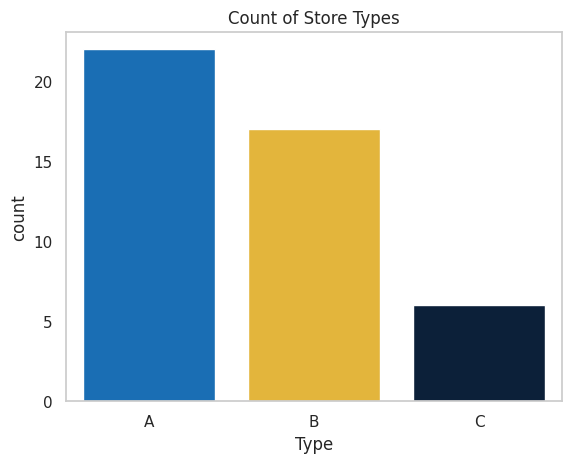

In [33]:
import warnings
warnings.filterwarnings('ignore') #ignore warnings
sns.countplot(x='Type', data=df_stores, palette=walmart_colors)
plt.title('Count of Store Types')
plt.grid(False)
plt.show()

In [34]:
df_stores = df_stores.merge(df_features,on='Store',how='left')
df_stores

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0
1,1,A,151315,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,1
2,1,A,151315,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0
3,1,A,151315,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0
4,1,A,151315,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,B,118221,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,172.460809,7.806,0
8186,45,B,118221,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,172.460809,7.806,0
8187,45,B,118221,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,172.460809,7.806,0
8188,45,B,118221,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,172.460809,7.806,0


In [35]:
df_train  = df_train.merge(df_stores,on=['Store','Date','IsHoliday'],how='left')
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday,day,week,month,year,day_period,...,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,5,5,2,2010,0,...,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,12,6,2,2010,7,...,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,19,7,2,2010,14,...,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,26,8,2,2010,21,...,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,5,9,3,2010,28,...,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420280,45,98,2012-09-28,508.37,False,28,39,9,2012,966,...,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
420281,45,98,2012-10-05,628.10,False,5,40,10,2012,973,...,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667
420282,45,98,2012-10-12,1061.02,False,12,41,10,2012,980,...,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667
420283,45,98,2012-10-19,760.01,False,19,42,10,2012,987,...,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667


In [36]:
df_test  = df_test.merge(df_stores,on=['Store','Date','IsHoliday'],how='left')
df_test

,Store,Dept,Date,IsHoliday,day,week,month,year,day_period,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,2,44,11,2012,0,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,9,45,11,2012,7,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,16,46,11,2012,14,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,23,47,11,2012,21,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,30,48,11,2012,28,A,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,28,26,6,2013,238,B,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,172.460809,7.806
115060,45,98,2013-07-05,False,5,27,7,2013,245,B,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,172.460809,7.806
115061,45,98,2013-07-12,False,12,28,7,2013,252,B,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,172.460809,7.806
115062,45,98,2013-07-19,False,19,29,7,2013,259,B,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,172.460809,7.806


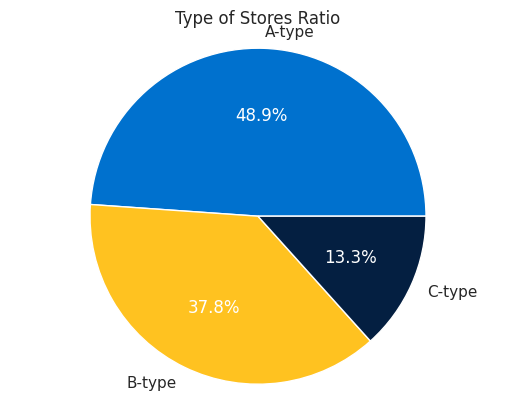

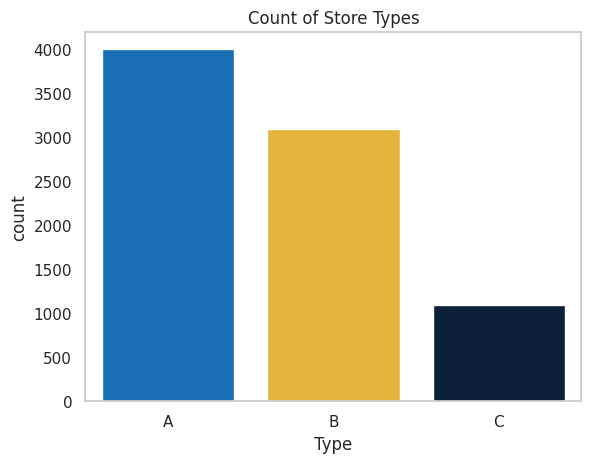

In [37]:
sizes=[(22/45)*100,(17/45)*100,(6/45)*100]
i_labels = 'A-type','B-type','C-type'
patches, texts, autotexts = plt.pie(sizes,labels=i_labels,autopct='%1.1f%%', colors=walmart_colors)
plt.title('Type of Stores Ratio')
plt.axis('equal')
for autotext in autotexts:
    autotext.set_color('white')
plt.show()

sns.countplot(x='Type', data=df_stores, palette=walmart_colors)
plt.title('Count of Store Types')
plt.grid(False)
plt.show()

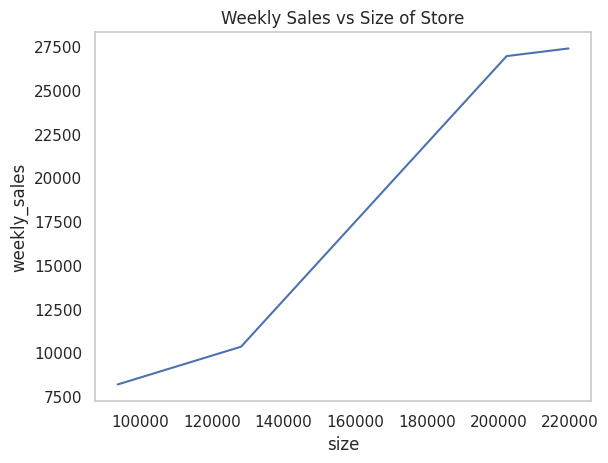

In [38]:
grouped_1=df_train.groupby('Size')
weekly_sales=list(grouped_1.mean()['Weekly_Sales'])
sq = (grouped_1['Size'].unique())
size = [i[0] for i in list(sq)]
weekly_sales = [x for _,x in sorted(zip(size,weekly_sales))]
size.sort()
sizes = []
for i in range(len(size)):
    if(i+1 == len(size)):
        sizes.append(size[i])
    elif ((i+1)%10==0):
        sizes.append(size[i])
weekly_sale=[]
for i in range(len(size)):
    if(i+1 == len(size)):
        weekly_sale.append(weekly_sales[i])
    elif ((i+1)%10==0):
        weekly_sale.append(weekly_sales[i])
weekly_sales
plt.plot(sizes, weekly_sale)
plt.title('Weekly Sales vs Size of Store')
plt.xlabel('size')
plt.ylabel('weekly_sales')
plt.grid(False)
plt.show()

as ***Size*** increases, ***weekly sales*** increases.

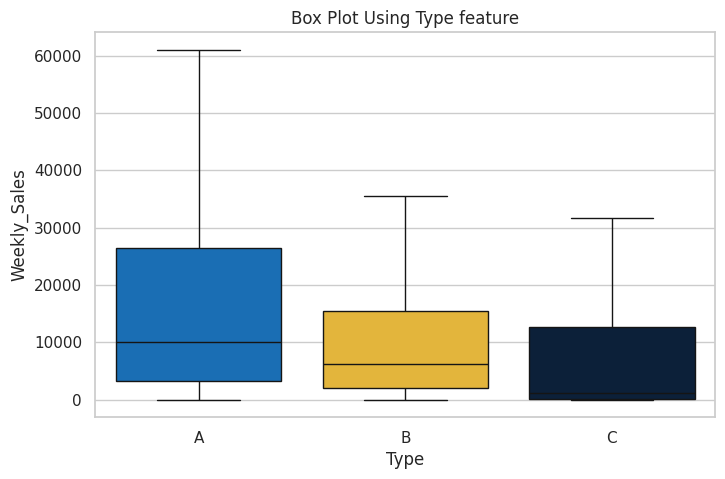

In [39]:
fig, ax = plt.subplots(figsize=(8, 5))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=df_train, showfliers=False, palette=walmart_colors)
plt.title("Box Plot Using Type feature")
plt.show()

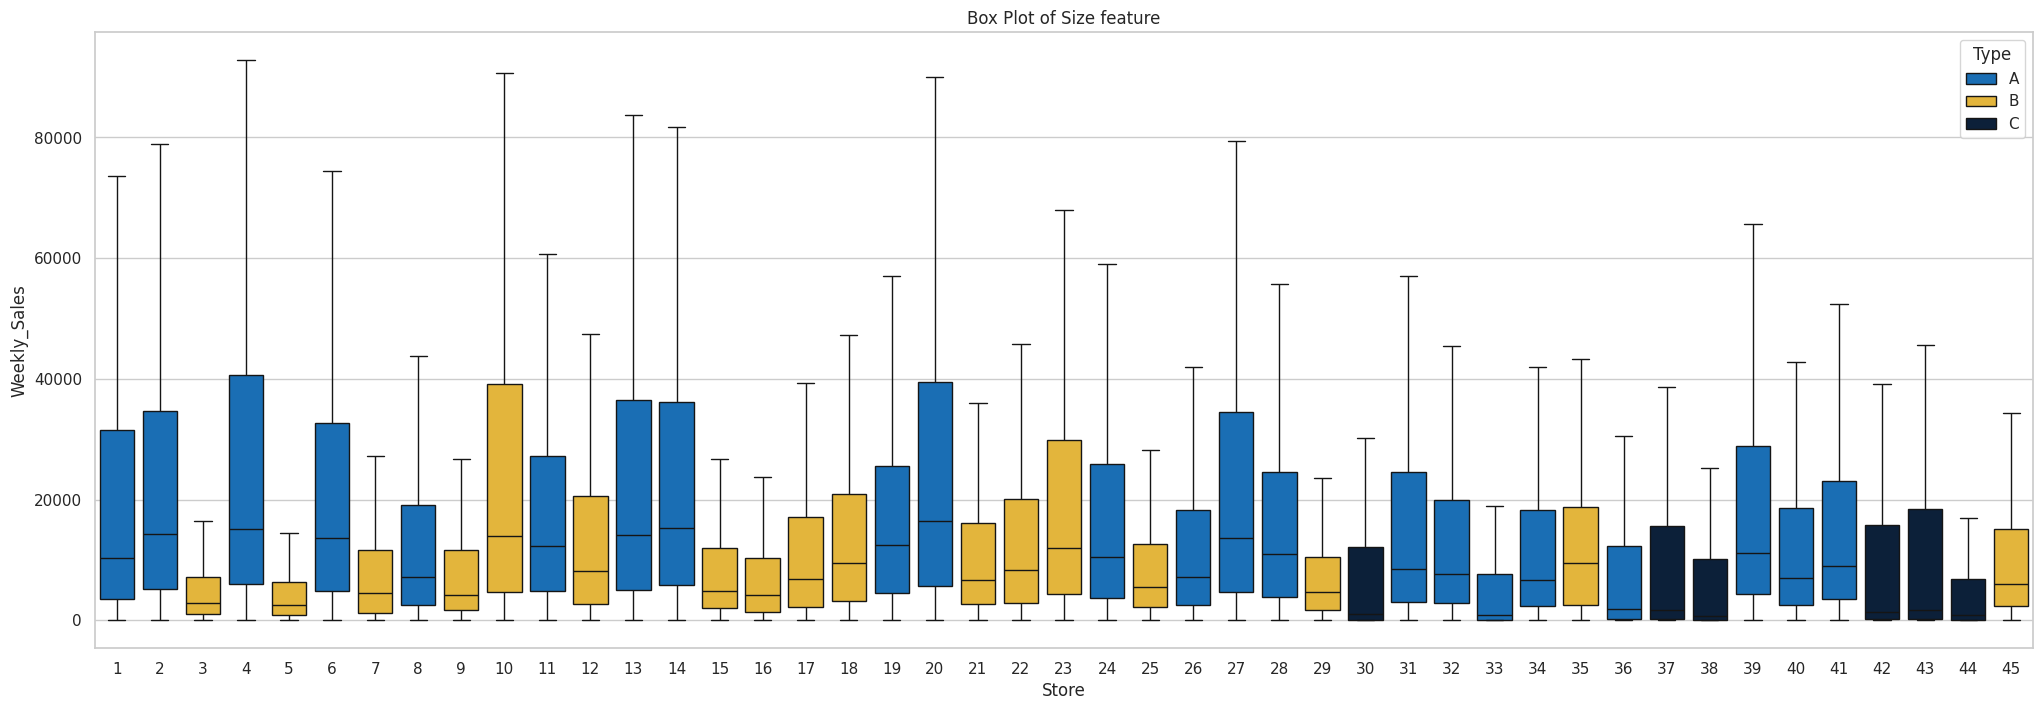

In [40]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(x="Store",y='Weekly_Sales',data=df_train,showfliers=False, hue="Type", palette=walmart_colors)
plt.title("Box Plot of Size feature")
plt.show()

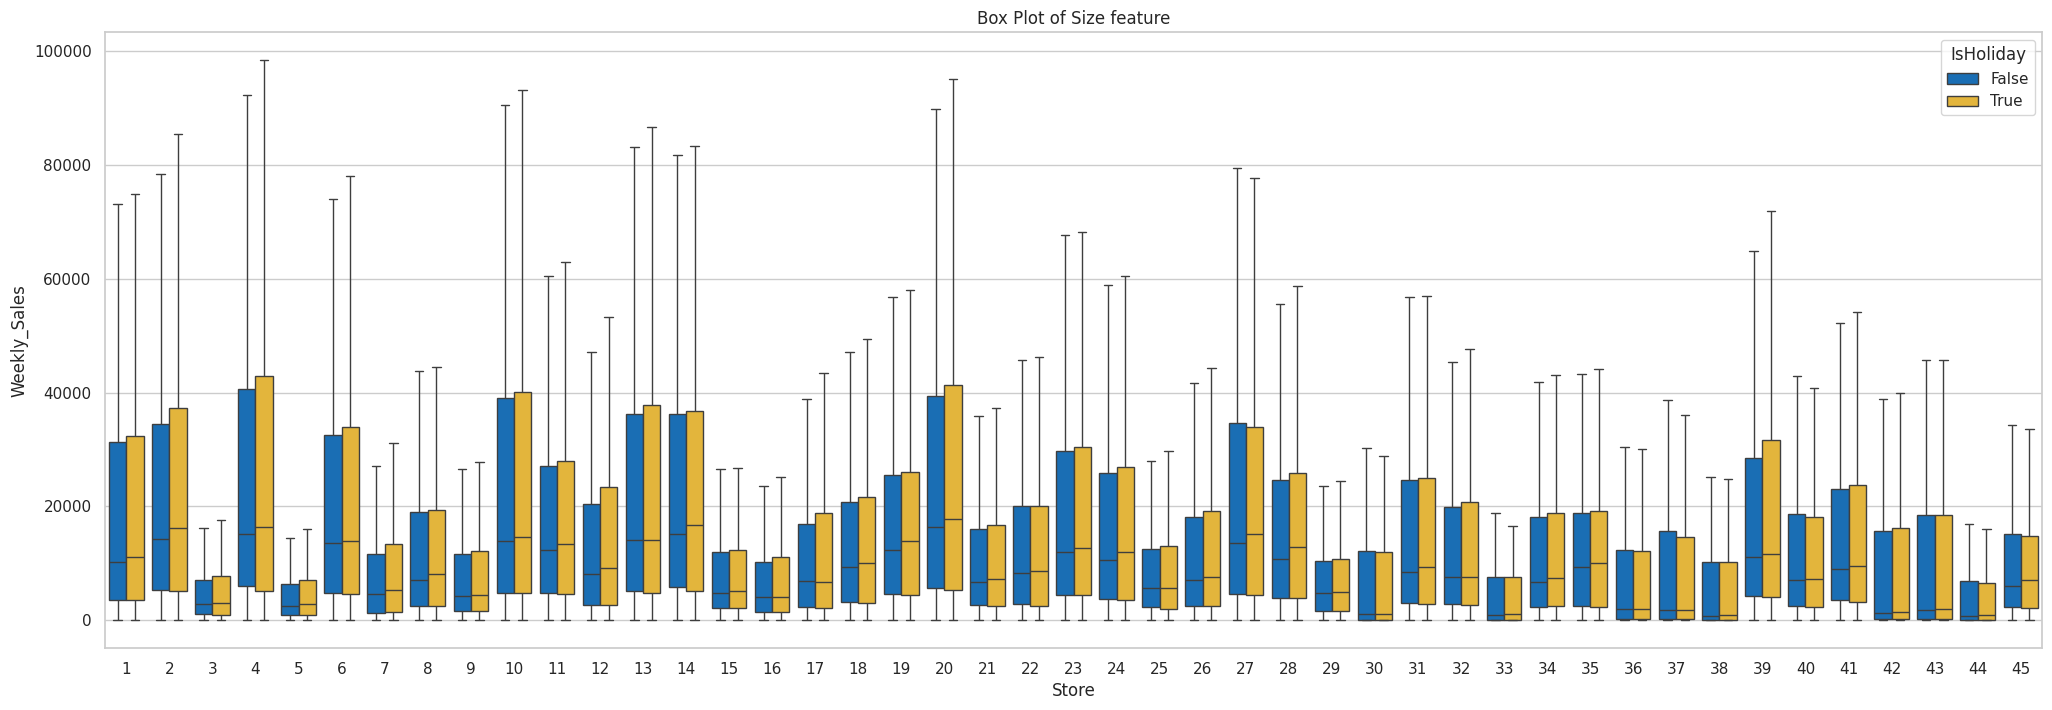

In [41]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(x="Store",y='Weekly_Sales',data=df_train,showfliers=False, hue="IsHoliday", palette=walmart_colors)
plt.title("Box Plot of Size feature")
plt.show()

Why ***only Some Stores*** show a high Holiday Sales ?


count    420285.000000
mean         44.242771
std          30.507197
min           1.000000
25%          18.000000
50%          37.000000
75%          74.000000
max          99.000000
Name: Dept, dtype: float64

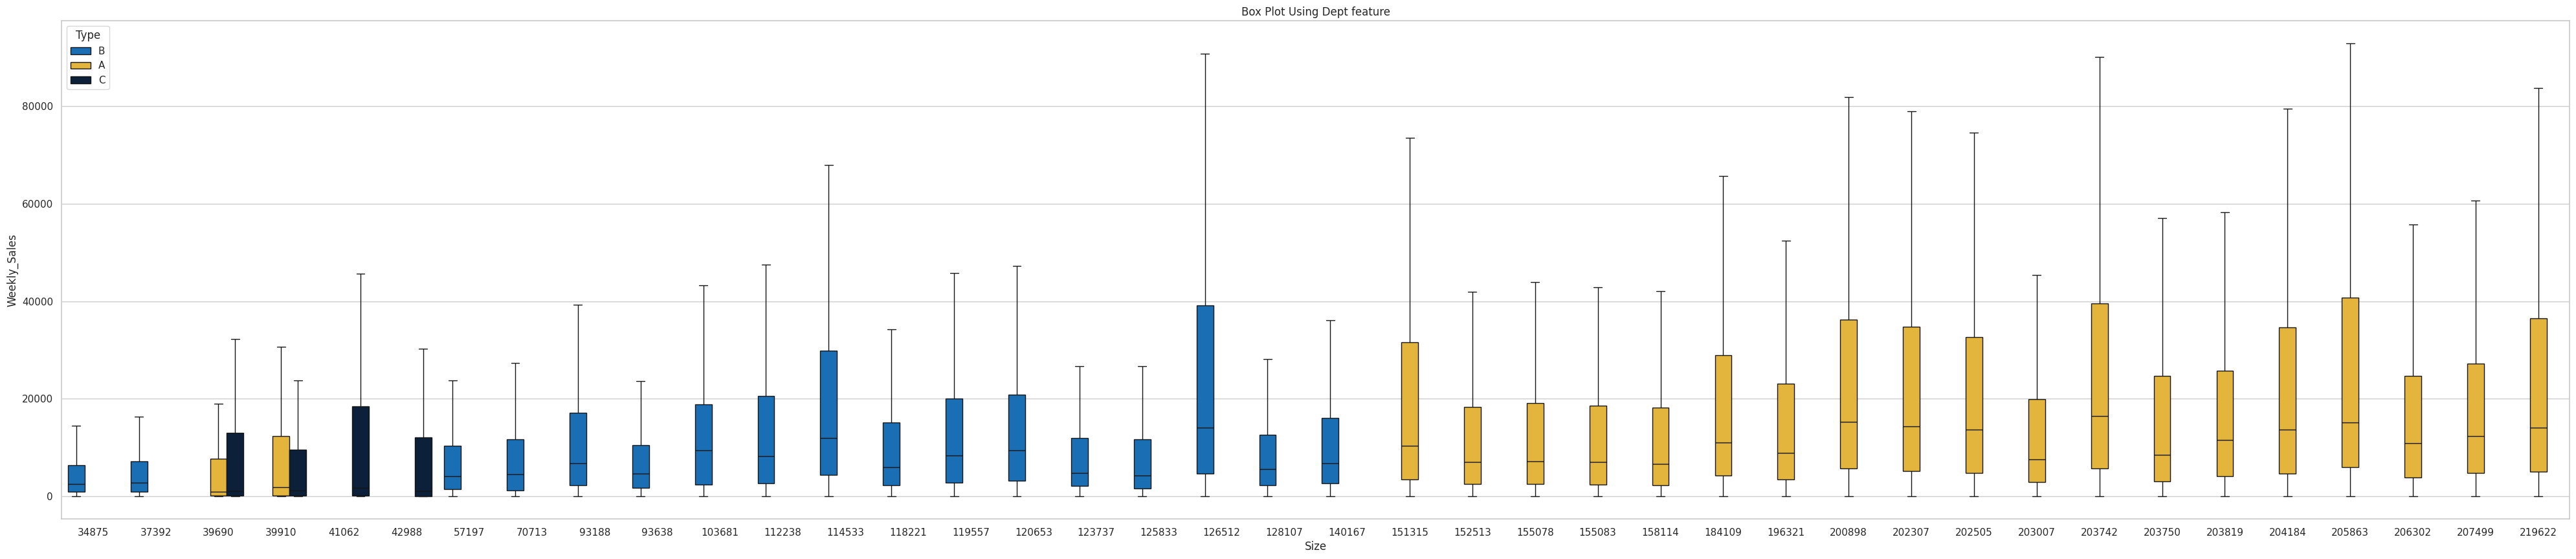

In [60]:
fig, ax = plt.subplots(figsize=(50, 10))
fig = sns.boxplot(y='Weekly_Sales', x='Size', data=df_train, showfliers=False, hue="Type", palette=walmart_colors)
plt.title("Box Plot Using Dept feature")
plt.show()

***Sizes*** of the Stores contribute to ***Sales***.

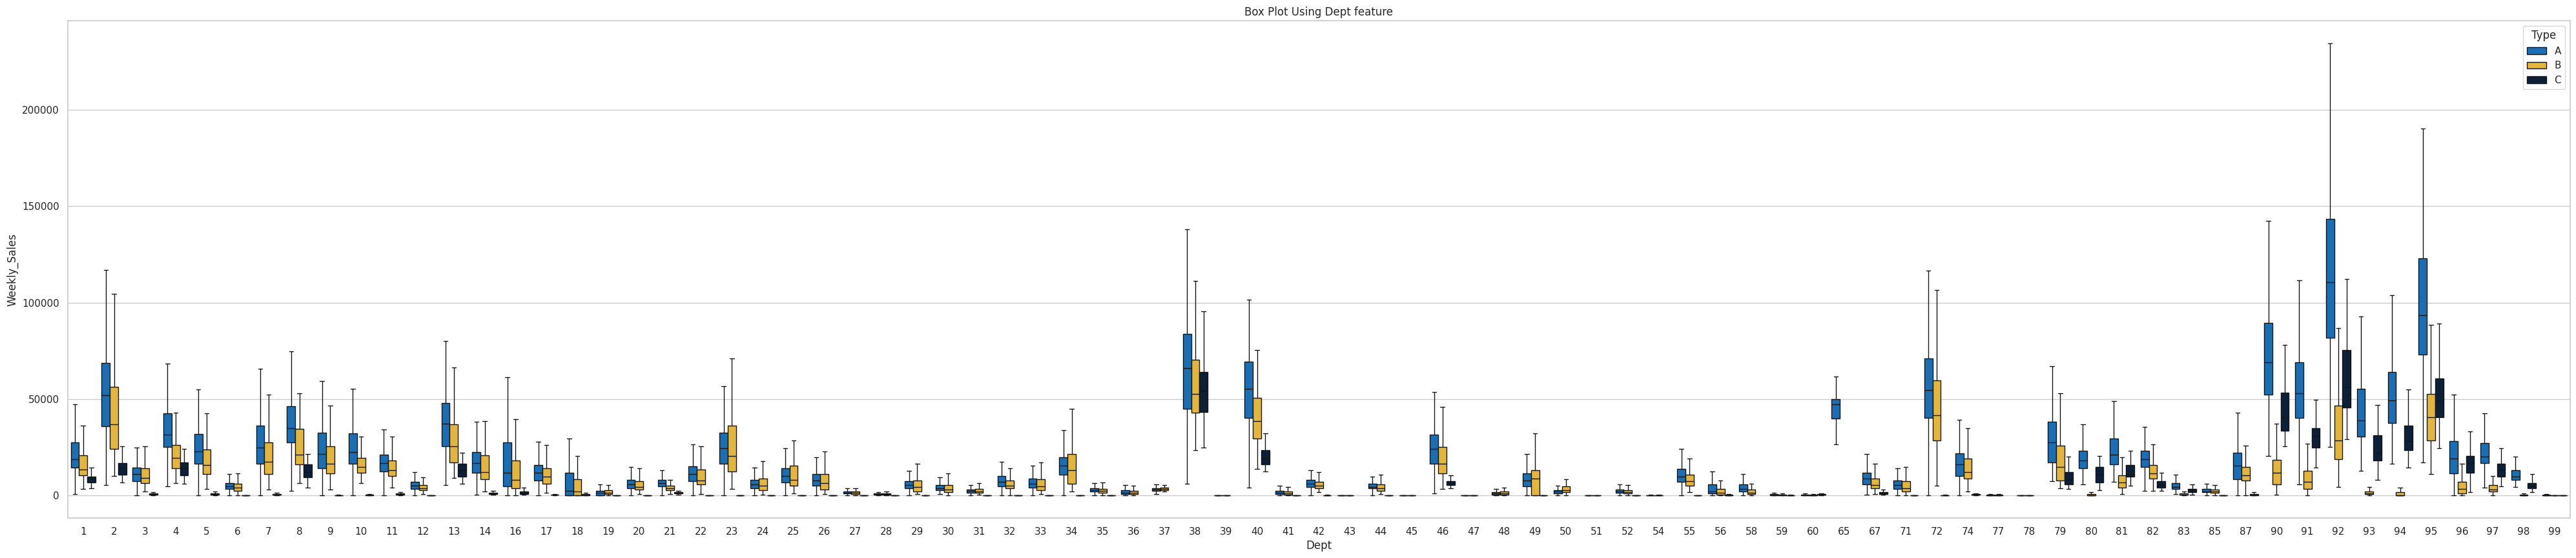

In [65]:
fig, ax = plt.subplots(figsize=(50, 10))
fig = sns.boxplot(y='Weekly_Sales', x='Dept', data=df_train, showfliers=False, hue="Type", palette=walmart_colors)
plt.title("Box Plot Using Dept feature")
plt.show()

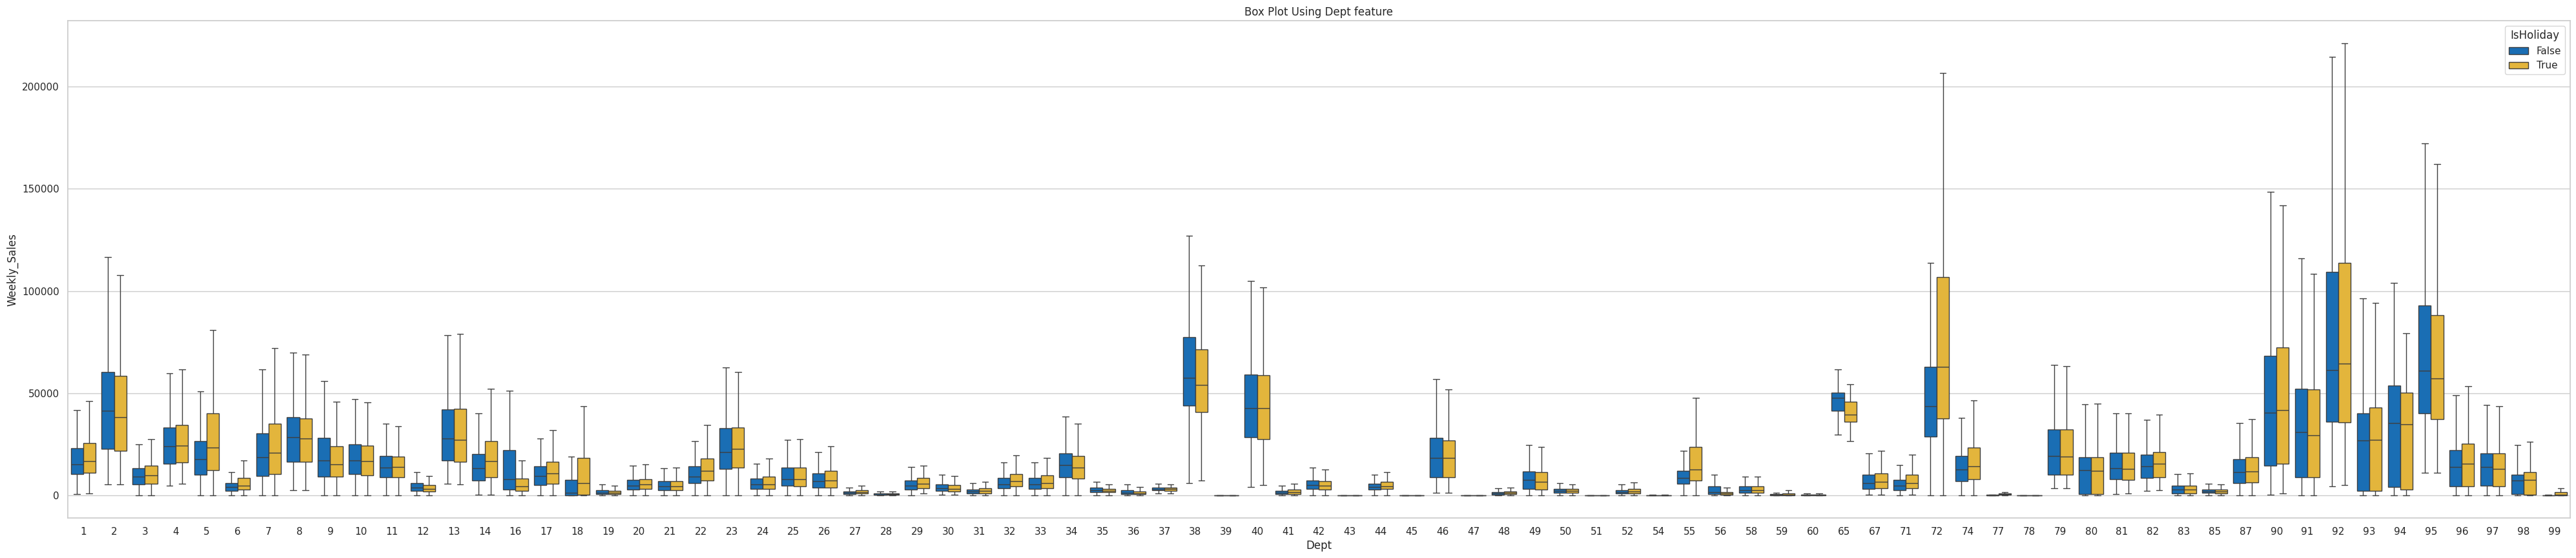

In [66]:
fig, ax = plt.subplots(figsize=(50, 10))
fig = sns.boxplot(y='Weekly_Sales', x='Dept', data=df_train, showfliers=False, hue="IsHoliday", palette=walmart_colors)
plt.title("Box Plot Using Dept feature")
plt.show()

There are ***99*** different departments .

***Dept*** of a Stores contribute very high to ***Sales***.

Further some Dept show little higher to almost same sales on non holiday; departments  1-13. These department are not useful in holidays season.

Most of the departments show ***higher sales on Holidays***.

Text(0.5, 1.0, 'Correlation Matrix')

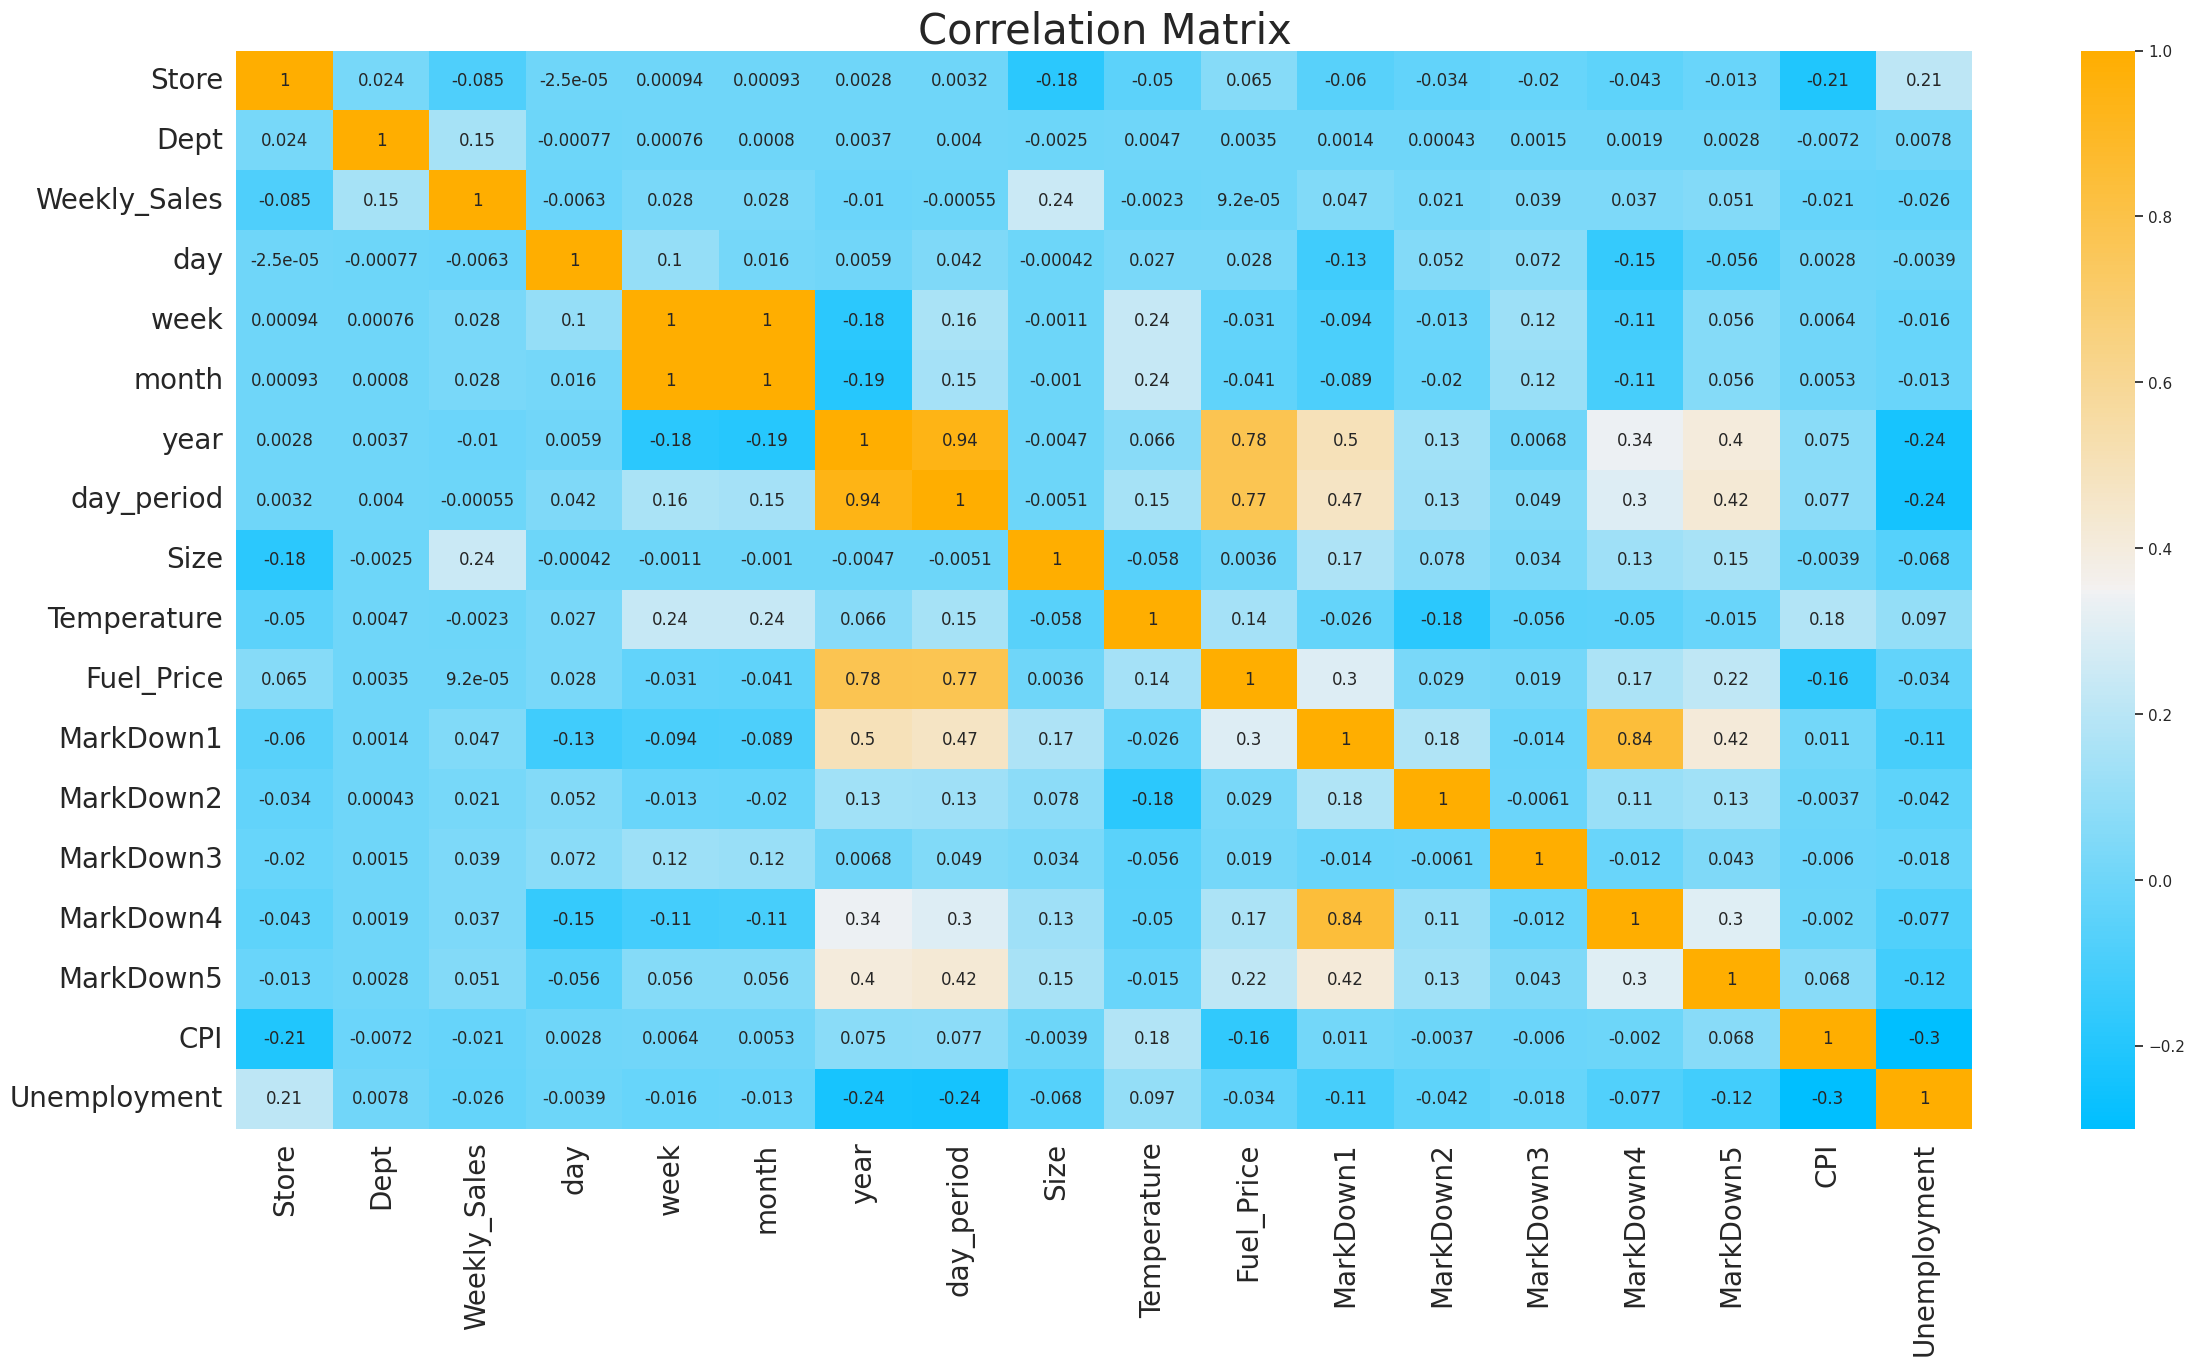

In [106]:
plt.figure(figsize=(28,14))
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)

custom_palette = sns.diverging_palette(254.18952979224463, 60,s=300, l=78, as_cmap=True)
sns.heatmap(df_train.corr(), cmap=custom_palette, annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=30)

All Markdowns show ***low correlation*** with Weekly Sales.

[56.71720746145017, 0.0, 100.0]

HUSL color code for RGB 0-113-206: [254.18952979224463, 0.0, 100.0]
HUSL color code for RGB 255-194-32: [56.71720746145017, 0.0, 100.0]
